<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Parcial 1 Física Avanzada para bioingenieros</font></b></h1>
        <h2><font color='0B5345'>Parcial 1 2025-01</font></h2>
        <h3><font color='0B5345'>Jader Chingal</font></h3>
    </div>
</div>

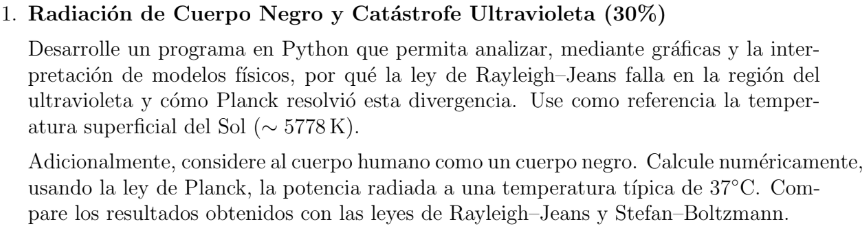

La ley de Rayleigh–Jeans falla en la región del ultravioleta debido a que se basa en los principios de la física clásica, donde se asume que la energía de las ondas electromagnéticas puede variar de forma continua y que cada modo de vibración de un campo electromagnético recibe una energía promedio constante de 𝑘𝐵𝑇. Este supuesto lleva a predecir que, a frecuencias altas (longitudes de onda cortas), la densidad de energía tiende a infinito, generando la conocida catástrofe ultravioleta, una contradicción evidente con los resultados experimentales.

Max Planck resolvió esta divergencia al introducir la hipótesis cuántica, postulando que la energía de los modos electromagnéticos está cuantizada, es decir, solo puede asumir valores discretos en múltiplos de un cuanto de energía 𝐸=𝑛ℎ𝜈. Este enfoque limita la contribución de las altas frecuencias, ya que los cuantos de energía para esas frecuencias son suficientemente grandes para que no se exciten fácilmente a temperaturas normales, evitando así la divergencia.

La ley de Planck, derivada de esta hipótesis, concuerda perfectamente con las observaciones experimentales en todo el espectro electromagnético, tanto en la región del infrarrojo (donde la ley de Rayleigh-Jeans es válida) como en la del ultravioleta (donde la ley clásica falla). Esta solución no solo resolvió un problema puntual de la física del cuerpo negro, sino que también marcó el inicio de la mecánica cuántica, transformando para siempre nuestra comprensión de la naturaleza. [1]

C:\Users\USER\AppData\Local\Temp\ipykernel_2372\580356799.py:21: RuntimeWarning: overflow encountered in exp
  return (2.0 * h * c**2) / (wavelength**5) * (1.0 / (np.exp(h * c / (wavelength * kB * T)) - 1.0))


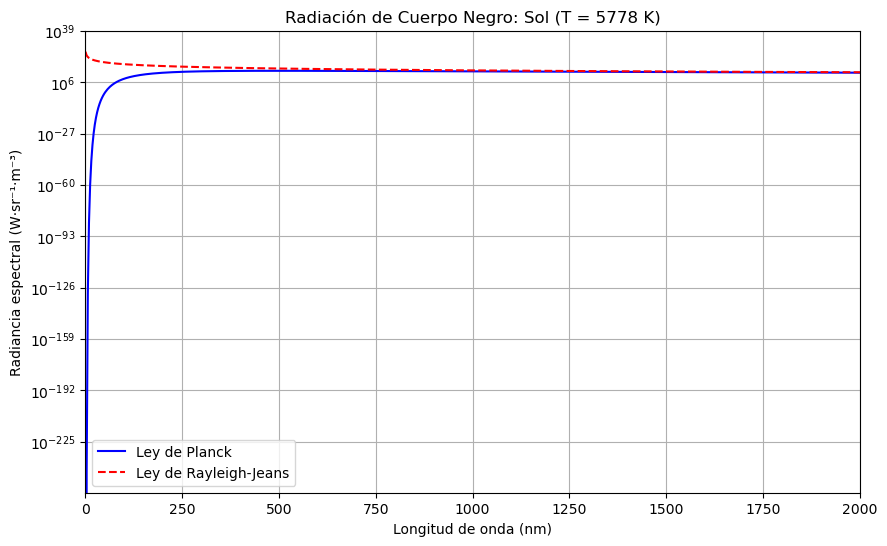

Potencia total radiada por el cuerpo humano:
Usando la Ley de Planck (integración numérica, 1 nm a 60,000 nm): 515.29 W/m²
Usando la Ley de Stefan-Boltzmann (espectro completo): 524.69 W/m²


C:\Users\USER\AppData\Local\Temp\ipykernel_2372\580356799.py:51: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  power_planck_human = simps(planck_human, wavelengths_human) * np.pi  # Emisión hemisférica (multiplicamos por pi)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
# from scipy.integrate import simpson  # puedes usar este si prefieres

# Constantes físicas
h = 6.626e-34  # Constante de Planck (J·s)
c = 3.0e8      # Velocidad de la luz (m/s)
kB = 1.381e-23 # Constante de Boltzmann (J/K)
sigma = 5.670374419e-8  # Constante de Stefan-Boltzmann (W/m^2·K^4)

# Temperaturas de referencia
T_sun = 5778  # Temperatura superficial del Sol (K)
T_human = 310.15  # Temperatura del cuerpo humano (37°C en K)

# Longitudes de onda para el Sol (gráfica) (sin cambios)
wavelengths_sun = np.linspace(1e-9, 3e-6, 1000)  # de 1 nm a 3000 nm (UV a infrarrojo)

# Ley de Planck
def planck_law(wavelength, T):
    return (2.0 * h * c**2) / (wavelength**5) * (1.0 / (np.exp(h * c / (wavelength * kB * T)) - 1.0))

# Ley de Rayleigh-Jeans
def rayleigh_jeans_law(wavelength, T):
    return (2.0 * c * kB * T) / (wavelength**4)

# Calcular distribuciones espectrales para el Sol (gráfica)
planck_sun = planck_law(wavelengths_sun, T_sun)
rayleigh_jeans_sun = rayleigh_jeans_law(wavelengths_sun, T_sun)

# Graficar espectro del Sol
plt.figure(figsize=(10, 6))
plt.plot(wavelengths_sun * 1e9, planck_sun, label='Ley de Planck', color='blue')
plt.plot(wavelengths_sun * 1e9, rayleigh_jeans_sun, label='Ley de Rayleigh-Jeans', color='red', linestyle='--')
plt.title('Radiación de Cuerpo Negro: Sol (T = 5778 K)')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Radiancia espectral (W·sr⁻¹·m⁻³)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.xlim(0, 2000)
plt.show()

# Longitudes de onda para el cuerpo humano (cálculo): de 1 nm a 60,000 nm (60 µm)
wavelengths_human = np.linspace(1e-9, 6e-5, 4000)

# Calcular radiancia espectral para el cuerpo humano (1 nm a 60,000 nm)
planck_human = planck_law(wavelengths_human, T_human)

# Potencia total radiada por el cuerpo humano usando Planck (integración numérica)
power_planck_human = simps(planck_human, wavelengths_human) * np.pi  # Emisión hemisférica (multiplicamos por pi)
# power_planck_human = simpson(planck_human, wavelengths_human) * np.pi  # Alternativa moderna

# Potencia total usando Stefan-Boltzmann
power_stefan_boltzmann_human = sigma * T_human**4

# Mostrar resultados
print("Potencia total radiada por el cuerpo humano:")
print(f"Usando la Ley de Planck (integración numérica, 1 nm a 60,000 nm): {power_planck_human:.2f} W/m²")
print(f"Usando la Ley de Stefan-Boltzmann (espectro completo): {power_stefan_boltzmann_human:.2f} W/m²")


La gráfica muestra cómo la ley de Rayleigh-Jeans (línea roja discontinua) diverge en la región del ultravioleta (longitudes de onda cortas), mientras que la ley de Planck (línea azul continua) predice correctamente que la radiancia espectral disminuye en esas frecuencias altas, resolviendo así la catástrofe ultravioleta.

tambien se calcula la potencia total radiada por el cuerpo humano por los dos metodos para esto se considera al cuerpo humano un cuerpo negro el cual absorbe toda la radiación electromagnética que incide sobre él, sin reflejar nada. por tanto emite radiación en todas las longitudes de onda dependiendo únicamente de su temperatura. la temperatura se la toma como 37°C ≈ 310 K.

Ley de Planck (integración numérica) = 515.29 (W/m²) en un rango de longitud de onda de  1 nm hasta 60,000 nm, en este rango se encuentra concentrada la mayor parte de la energía entre aproximadamente 5000 nm y 50000 nm (infrarrojo medio y lejano). por tanto no seria del todo correcto tomar un arango mayor 

Ley de Stefan-Boltzmann = 524.6853 (W/m²) integra en todo el espectro ultravioleta




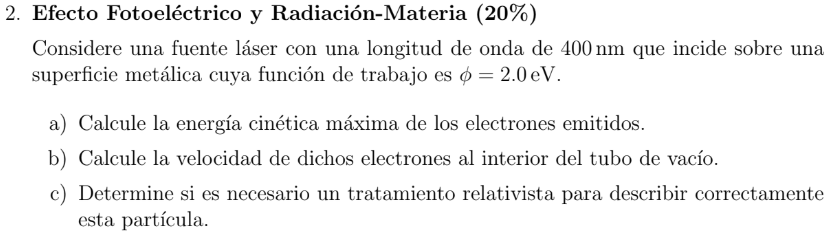



El efecto fotoeléctrico es la emisión de electrones por parte de un material cuando este es iluminado por radiación electromagnética (generalmente luz ultravioleta o visible). Este fenómeno no podía ser explicado por la física clásica, que predecía que la energía de la luz dependía de su intensidad, sin importar la frecuencia. Albert Einstein, en 1905, propuso que la luz está compuesta por paquetes discretos de energía llamados fotones (concepto derivado de la hipótesis cuántica de Planck). [2]

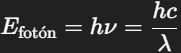

la ecuacion de Einstein para el efecto fotoeléctrico es:

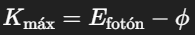

Una vez obtenida la energía cinética máxima (𝐾máx), se puede calcular la velocidad del electrón usando la fórmula clásica: 

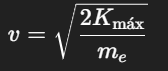

para este ejercicio no es necesario un tratamiento relativista debido a que este es necesario cuando la velocidad del electrón es una fracción significativa de la velocidad de la luz. Una regla práctica es: 

 *Si 𝑣/𝑐≥0.1 (10% de la velocidad de la luz), sí se requiere relatividad.

 *Si 𝑣/𝑐<0.1 el modelo clásico es suficiente.
​



In [9]:
import numpy as np
from scipy.integrate import simps  # Solo si quieres integraciones después (opcional)

# Constantes físicas
h = 6.626e-34      # Constante de Planck (J·s)
c = 3.0e8          # Velocidad de la luz (m/s)
e = 1.602e-19      # Carga del electrón (Coulombs)
m_e = 9.109e-31    # Masa del electrón (kg)

# Datos del problema
wavelength = 400e-9  # Longitud de onda del láser (400 nm en metros)
phi_eV = 2.0         # Función de trabajo en eV
phi_J = phi_eV * e   # Función de trabajo convertida a Joules

# a) Calcular la energía cinética máxima de los electrones emitidos

# Energía del fotón: E = h*c / lambda
E_photon_J = h * c / wavelength          # Energía del fotón en Joules
E_photon_eV = E_photon_J / e              # Energía del fotón en eV (convertido)

# Energía cinética máxima: K_max = E_photon - phi
K_max_J = E_photon_J - phi_J              # Energía cinética máxima en Joules
K_max_eV = K_max_J / e                    # Energía cinética máxima en eV

# b) Calcular la velocidad de los electrones emitidos (modelo clásico)
# K_max = 0.5 * m * v^2  -->  v = sqrt(2*K_max / m)
v = np.sqrt(2 * K_max_J / m_e)

# c) Evaluar si es necesario un tratamiento relativista
# Comparar la velocidad obtenida con la velocidad de la luz (v/c)
v_relativa = v / c

# Mostrar resultados
print(f"Energía del fotón: {E_photon_eV:.2f} eV")
print(f"Energía cinética máxima (K_max): {K_max_eV:.2f} eV")
print(f"Velocidad del electrón: {v:.2e} m/s")
print(f"Relación v/c: {v_relativa:.5f}")

# Decisión sobre relatividad
if v_relativa >= 0.1:
    print("Se requiere tratamiento relativista.")
else:
    print("No se requiere tratamiento relativista (modelo clásico es suficiente).")


Energía del fotón: 3.10 eV
Energía cinética máxima (K_max): 1.10 eV
Velocidad del electrón: 6.23e+05 m/s
Relación v/c: 0.00208
No se requiere tratamiento relativista (modelo clásico es suficiente).


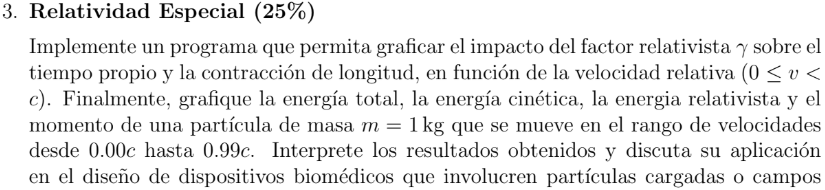

El factor relativista 𝛾 es una medida de cuán intensos son los efectos relativistas (dilatación del tiempo y contracción de la longitud) cuando un objeto se mueve a una velocidad relativa 𝑣 respecto a un observador.

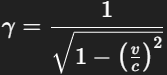

** Si 𝑣≪𝑐 → 𝛾 ≈ 1 (los efectos relativistas son despreciables).

** Si 𝑣 se acerca a 𝑐 → 𝛾 → ∞ (los efectos relativistas se disparan).

Es la clave que conecta la velocidad relativa con el tiempo y el espacio desde diferentes sistemas de referencia.

**Impacto sobre el tiempo propio (Dilatación del tiempo)**

Cuando un objeto se mueve a altas velocidades (cercanas a la velocidad de la luz), el tiempo que experimenta dicho objeto (tiempo propio) transcurre más lentamente comparado con el tiempo que mide un observador externo.
Este fenómeno se conoce como dilatación del tiempo y está gobernado por el factor relativista 𝛾:

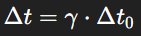

** A bajas velocidades, 𝛾 ≈ 1, por lo que el tiempo propio y el tiempo externo son casi iguales.

** A velocidades cercanas a 𝑐, 𝛾 crece mucho, haciendo que el tiempo propio transcurra más lento comparado con el tiempo externo.

**Impacto sobre la longitud propia (Contracción de la longitud)**

Por otro lado, la longitud propia de un objeto (la medida en su sistema de reposo) se reduce desde la perspectiva de un observador externo cuando el objeto se mueve a altas velocidades. Este fenómeno se llama contracción de la longitud y se expresa así:

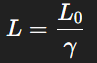

** A bajas velocidades, 𝛾 ≈ 1, por lo que la longitud observada es igual a la longitud propia.

** A velocidades cercanas a 𝑐, 𝛾 aumenta, por lo que la longitud observada se contrae significativamente.

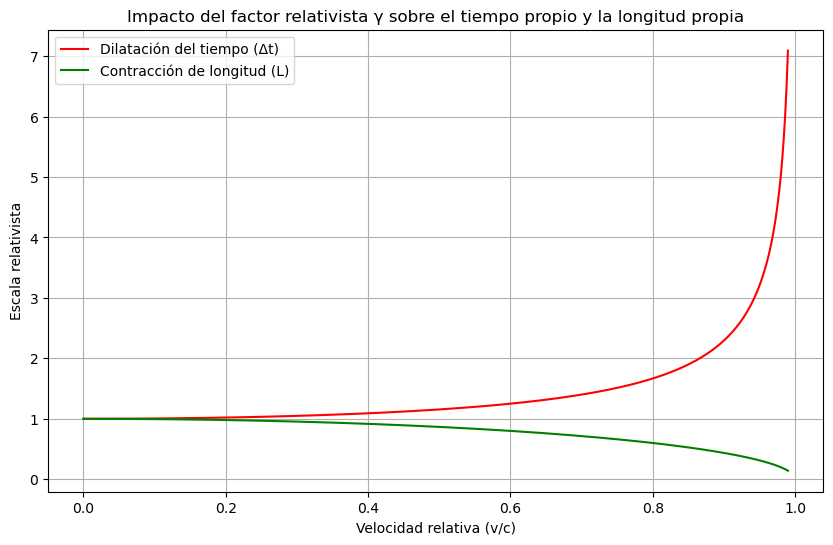

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
c = 3.0e8  # Velocidad de la luz (m/s)

# Rango de velocidades desde 0 hasta 0.99c
v = np.linspace(0, 0.99 * c, 500)

# Factor relativista gamma
gamma = 1 / np.sqrt(1 - (v / c)**2)

# Dilatación del tiempo
delta_t0 = 1  # Tiempo propio arbitrario (1 segundo)
delta_t = gamma * delta_t0  # Tiempo dilatado

# Contracción de longitud
L0 = 1  # Longitud propia arbitraria (1 metro)
L = L0 / gamma  # Longitud contraída

# Gráfica
plt.figure(figsize=(10, 6))

# Dilatación del tiempo
plt.plot(v / c, delta_t, label='Dilatación del tiempo (Δt)', color='red')

# Contracción de la longitud
plt.plot(v / c, L, label='Contracción de longitud (L)', color='green')

# Formato del gráfico
plt.xlabel('Velocidad relativa (v/c)')
plt.ylabel('Escala relativista')
plt.title('Impacto del factor relativista γ sobre el tiempo propio y la longitud propia')
plt.legend()
plt.grid(True)
plt.show()


La gráfica muestra cómo el factor relativista \( \gamma \) afecta simultáneamente al tiempo propio y a la longitud propia de un objeto que se mueve a diferentes velocidades relativas \( v \), desde el reposo hasta cerca de la velocidad de la luz. A medida que la velocidad del objeto aumenta, el tiempo dilatado (representado por la curva roja) crece progresivamente, lo que significa que el tiempo transcurre más lentamente para el objeto en movimiento desde la perspectiva de un observador en reposo. Por otro lado, la longitud contraída (representada por la curva verde) disminuye, indicando que la longitud del objeto en movimiento se acorta en la dirección del movimiento cuando es observada desde un marco externo. A velocidades bajas, estos efectos son casi imperceptibles, ya que el factor \( \gamma \) es cercano a 1, pero a medida que el objeto se acerca a la velocidad de la luz, el tiempo se dilata enormemente y la longitud se contrae significativamente, mostrando el comportamiento extremo de la relatividad especial. Esta relación ilustra cómo el espacio y el tiempo se transforman de manera opuesta: mientras el tiempo se estira**, el espacio se encoge**, todo bajo la influencia del factor relativista.

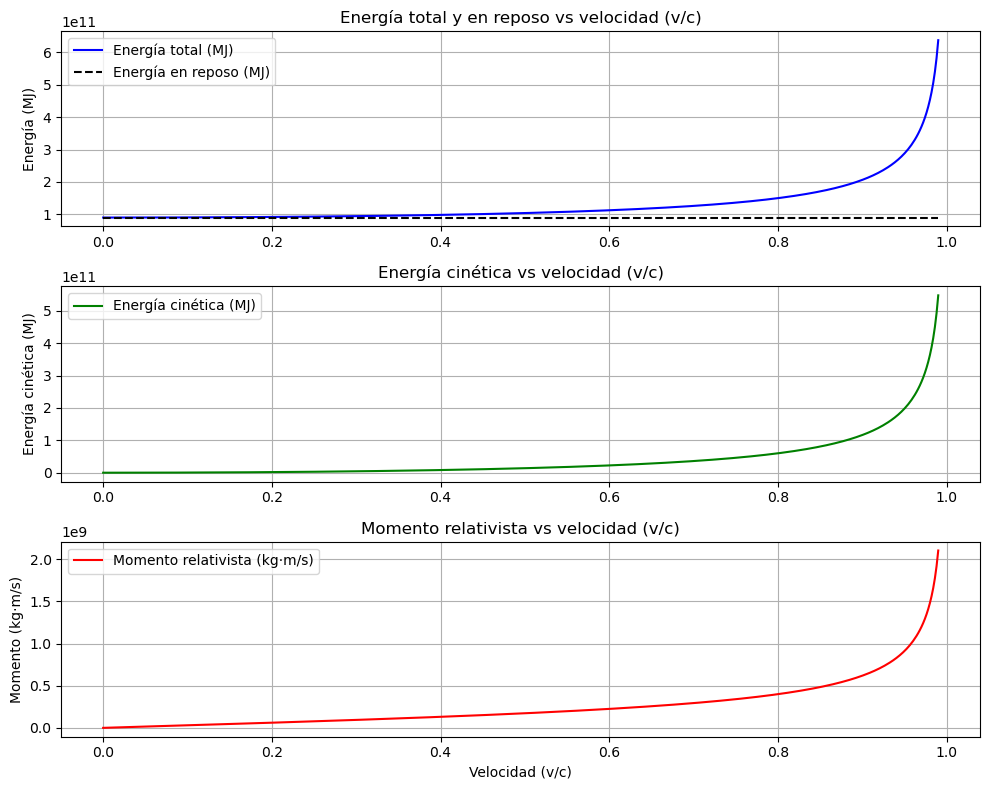

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
c = 3.0e8  # Velocidad de la luz (m/s)
m = 1.0    # Masa de la partícula (kg)

# Rango de velocidades desde 0 hasta 0.99c
v = np.linspace(0, 0.99 * c, 500)

# Factor relativista gamma
gamma = 1 / np.sqrt(1 - (v / c)**2)

# Energías relativistas
E_total = gamma * m * c**2           # Energía total (relativista)
E0 = m * c**2                        # Energía en reposo
K = E_total - E0                      # Energía cinética relativista

# Momento relativista
p = gamma * m * v

# Graficar Energía total, Energía cinética, Energía en reposo y Momento relativista
plt.figure(figsize=(10, 8))

# Energía total y energía en reposo
plt.subplot(3, 1, 1)
plt.plot(v / c, E_total / 1e6, color='blue', label='Energía total (MJ)')
plt.plot(v / c, np.full_like(v, E0 / 1e6), color='black', linestyle='--', label='Energía en reposo (MJ)')
plt.ylabel('Energía (MJ)')
plt.title('Energía total y en reposo vs velocidad (v/c)')
plt.legend()
plt.grid(True)

# Energía cinética
plt.subplot(3, 1, 2)
plt.plot(v / c, K / 1e6, color='green', label='Energía cinética (MJ)')
plt.ylabel('Energía cinética (MJ)')
plt.title('Energía cinética vs velocidad (v/c)')
plt.legend()
plt.grid(True)

# Momento relativista
plt.subplot(3, 1, 3)
plt.plot(v / c, p, color='red', label='Momento relativista (kg·m/s)')
plt.xlabel('Velocidad (v/c)')
plt.ylabel('Momento (kg·m/s)')
plt.title('Momento relativista vs velocidad (v/c)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Estas gráficas muestran cómo se comportan la energía total, la energía cinética y el momento relativista de una partícula de masa 1 kg que se mueve desde reposo (0c) hasta 0.99c (99% de la velocidad de la luz).

**Energía total y energía en reposo**

En el primer gráfico se analizan la energía total y la energía en reposo de un objeto en función de su velocidad. La energía total (representada por la línea azul) aumenta de manera lenta a bajas velocidades, pero crece de forma exponencial al acercarse a velocidades próximas a 0.99𝑐. Por otro lado, la energía en reposo (representada por la línea negra discontinua) permanece constante en todo momento, de acuerdo con a la ecuación 𝐸 = 𝑚𝑐^2 que para un objeto de 1 kg equivale aproximadamente a 90 PJ. En cuanto a la interpretación, a velocidades bajas, la energía total está dominada casi por completo por la energía en reposo. Sin embargo, a velocidades altas, la energía total se incrementa drásticamente debido a la influencia de los efectos relativistas, que se reflejan en el aumento del factor 𝛾.

**Energía cinética**

El comportamiento de la energía cinética muestra que, a bajas velocidades, esta crece de manera suave, en concordancia con las predicciones de la física clásica; sin embargo, al acercarse a 0.99𝑐, su incremento se vuelve muy rápido. Esto se interpreta como la necesidad de aportar cantidades cada vez mayores de energía cinética para aproximarse a la velocidad de la luz, un objetivo que en realidad es inalcanzable, ya que la energía requerida tiende a infinito. Como dato ilustrativo, a una velocidad de 0.9𝑐, la energía cinética de un objeto es aproximadamente más de cuatro veces mayor que su energía en reposo.

**Momento relativista**

El comportamiento del momento relativista, representado por la línea roja, muestra un crecimiento lineal a bajas velocidades, tal como predice la física clásica; sin embargo, al acercarse a 0.99𝑐, este crecimiento se vuelve mucho más rápido. La interpretación de este fenómeno radica en que, a velocidades cercanas a la de la luz, el momento ya no sigue la relación clásica 𝑝 = 𝑚𝑣, sino que se ve multiplicado por el factor relativista 𝛾, provocando que el momento aumente de manera desproporcionada.

**Resonador magnetico**

En el diseño de dispositivos biomédicos, como los resonadores magnéticos (RM), los principios de la relatividad especial juegan un papel relevante, aunque de manera indirecta. En la resonancia magnética nuclear, los núcleos atómicos (principalmente protones) oscilan en respuesta a campos magnéticos intensos y pulsos de radiofrecuencia, pero estos núcleos no alcanzan velocidades relativistas. Sin embargo, los componentes electrónicos y magnéticos del sistema, especialmente los imanes superconductores, sí pueden verse afectados por efectos relativistas sutiles. En resonadores magnéticos de alto campo (7 Tesla o más), las correcciones relativistas influyen en las propiedades de los materiales superconductores, ajustando características como la penetración del campo magnético o la longitud de coherencia de los pares de Cooper, fundamentales para mantener la estabilidad y eficiencia de estos imanes.

Además, en la sincronización de las señales de radiofrecuencia (RF) utilizadas en la RM, es crucial una precisión extrema en la medición del tiempo, ya que las señales de los protones deben ser captadas en sincronía con los pulsos emitidos. Aunque los efectos relativistas sobre la dilatación del tiempo son mínimos en este contexto, se consideran en el procesamiento de señales electrónicas, especialmente bajo entornos electromagnéticos intensos, garantizando así la precisión diagnóstica.

En contraste, en dispositivos biomédicos como los aceleradores de partículas para terapia de protones, las correcciones relativistas son esenciales. Aquí, los protones alcanzan velocidades relativistas, lo que requiere ajustar sus energía cinética, momento y trayectoria para dirigir la dosis de radiación con máxima precisión hacia los tejidos malignos, minimizando el daño a los tejidos sanos.

Así, aunque la relatividad especial no afecta directamente la dinámica de los protones en RM, es fundamental en el diseño de componentes electrónicos y magnéticos de precisión y es crítica en dispositivos donde las partículas alcanzan velocidades cercanas a la luz, como los aceleradores biomédicos.[3]

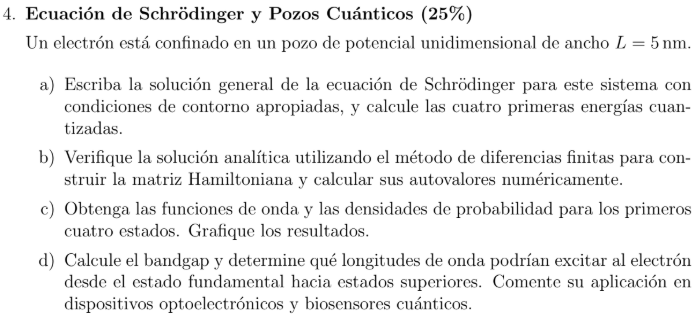

**Ecuación de Schrödinger en el pozo**
Es la ecuación fundamental de la mecánica cuántica, análoga a las leyes de Newton en la mecánica clásica, pero describe cómo evoluciona el estado cuántico de una partícula.

si modelamos el problema del pozo se trata de un electrón atrapado entre dos barreras de potencial infinitas, donde el potencial es cero dentro del pozo (entre 𝑥=0 y 𝑥 = 𝐿) y es infinito fuera de él, lo que impide que la partícula escape. La ecuación de Schrödinger independiente del tiempo describe este sistema, y al resolverla dentro del pozo, se obtiene una función de onda sinusoidal, mientras que fuera del pozo la función de onda es nula debido a las barreras infinitas. Las condiciones de contorno exigen que la función de onda sea cero en los bordes del pozo, lo que lleva a que solo ciertos valores discretos de energía sean permitidos, fenómeno conocido como cuantización de la energía. Las energías permitidas para la partícula están dadas por la fórmula :

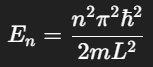

donde 𝑛 es el número cuántico (un entero positivo), 𝑚 es la masa del electrón, ℏ es la constante de Planck reducida y 𝐿 es el ancho del pozo. Esta fórmula muestra que las energías dependen del cuadrado de 𝑛, lo que significa que los niveles de energía se separan cada vez más a medida que aumenta 𝑛.


In [ ]:
import numpy as np
import pandas as pd

# Constantes físicas
hbar = 1.055e-34     # Constante de Planck reducida (J·s)
m_e = 9.109e-31      # Masa del electrón (kg)
L = 5e-9             # Ancho del pozo (5 nm)

# Fórmula para las energías cuantizadas en un pozo infinito
def energia_n(n, hbar, m, L):
    return (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)

# Calcular las energías para los primeros 4 niveles
niveles = [1, 2, 3, 4]
energias_J = [energia_n(n, hbar, m_e, L) for n in niveles]          # Energías en Joules
energias_eV = [E / 1.602e-19 for E in energias_J]                   # Convertir a electronvoltios (eV)

# Mostrar resultados en formato de tabla
df = pd.DataFrame({
    'Nivel cuántico (n)': niveles,
    'Energía (J)': energias_J,
    'Energía (eV)': energias_eV
})

print(df)

   Nivel cuántico (n)   Energía (J)  Energía (eV)
0                   1  2.411926e-21      0.015056
1                   2  9.647704e-21      0.060223
2                   3  2.170733e-20      0.135501
3                   4  3.859081e-20      0.240891


**Método de diferencias finitas**
La ecuación de Schrödinger se aproxima mediante una discretización del espacio, lo que permite representar el problema en forma matricial. Para ello, se construye una matriz Hamiltoniana que refleja la energía total del sistema: los términos diagonales corresponden a la energía potencial, mientras que los términos fuera de la diagonal representan la energía cinética, asociada a las derivadas espaciales. Este enfoque permite resolver numéricamente los niveles de energía del sistema sin necesidad de encontrar una solución analítica de la ecuación diferencial.

La forma de la matriz Hamiltoniana:

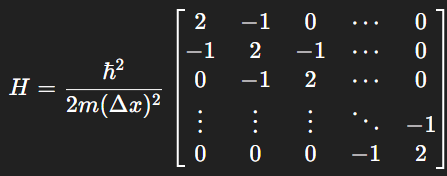

In [14]:
import numpy as np
from scipy.linalg import eigh
import pandas as pd

# Constantes físicas
hbar = 1.055e-34   # Constante de Planck reducida (J·s)
m_e = 9.109e-31    # Masa del electrón (kg)
L = 5e-9           # Ancho del pozo (5 nm)

# Parámetros del método de diferencias finitas
N = 1000                     # Número de puntos de discretización (más puntos, más precisión)
dx = L / (N + 1)             # Paso de discretización (se excluyen los extremos)

# Construcción de la matriz Hamiltoniana (operador cinético)
# Diagonal principal (2/h^2) y sub/superdiagonales (-1/h^2)
diagonal = 2.0 * np.ones(N)
off_diagonal = -1.0 * np.ones(N - 1)
H = (hbar**2 / (2 * m_e * dx**2)) * (np.diag(diagonal) + np.diag(off_diagonal, 1) + np.diag(off_diagonal, -1))

# Cálculo de autovalores (energías) y autovectores (funciones de onda)
eigenvalues, eigenvectors = eigh(H)

# Seleccionar las primeras 4 energías y convertirlas a electronvoltios (eV)
eigenvalues_eV = eigenvalues[:4] / 1.602e-19  # 1 eV = 1.602e-19 J

# Mostrar resultados en formato tabla
df = pd.DataFrame({
    'Nivel cuántico (n)': [1, 2, 3, 4],
    'Energía (eV)': eigenvalues_eV
})

print(df)


   Nivel cuántico (n)  Energía (eV)
0                   1      0.015056
1                   2      0.060223
2                   3      0.135500
3                   4      0.240888


Las energías numéricas coinciden casi exactamente con las energías analíticas, presentando únicamente diferencias mínimas debido al redondeo y a la discretización, lo cual verifica la validez del método.

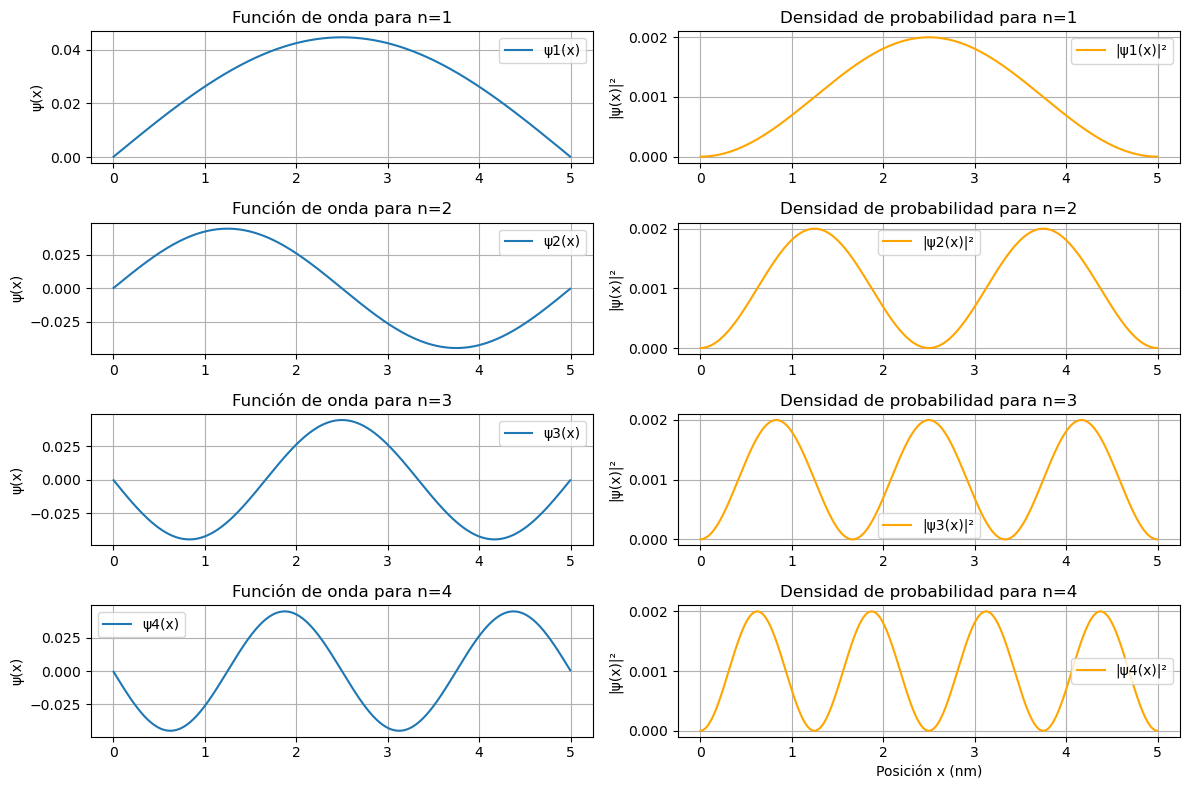

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constantes físicas
hbar = 1.055e-34   # Constante de Planck reducida (J·s)
m_e = 9.109e-31    # Masa del electrón (kg)
L = 5e-9           # Ancho del pozo (5 nm)

# Parámetros del método de diferencias finitas
N = 1000                     # Número de puntos de discretización
dx = L / (N + 1)             # Paso de discretización

# Construcción de la matriz Hamiltoniana (operador cinético)
diagonal = 2.0 * np.ones(N)
off_diagonal = -1.0 * np.ones(N - 1)
H = (hbar**2 / (2 * m_e * dx**2)) * (np.diag(diagonal) + np.diag(off_diagonal, 1) + np.diag(off_diagonal, -1))

# Cálculo de autovalores y autovectores (funciones de onda)
eigenvalues, eigenvectors = eigh(H)

# Extraer las funciones de onda para los primeros 4 estados
wavefunctions = eigenvectors[:, :4]

# Coordenadas espaciales (excluyendo extremos)
x = np.linspace(dx, L - dx, N)

# Calcular densidades de probabilidad |ψ(x)|²
densities = wavefunctions**2

# Graficar las funciones de onda y las densidades de probabilidad
plt.figure(figsize=(12, 8))

for n in range(4):
    plt.subplot(4, 2, 2*n + 1)
    plt.plot(x * 1e9, wavefunctions[:, n], label=f'ψ{n+1}(x)')
    plt.ylabel('ψ(x)')
    plt.title(f'Función de onda para n={n+1}')
    plt.grid(True)
    plt.legend()

    plt.subplot(4, 2, 2*n + 2)
    plt.plot(x * 1e9, densities[:, n], label=f'|ψ{n+1}(x)|²', color='orange')
    plt.ylabel('|ψ(x)|²')
    plt.title(f'Densidad de probabilidad para n={n+1}')
    plt.grid(True)
    plt.legend()

plt.xlabel('Posición x (nm)')
plt.tight_layout()
plt.show()


Las gráficas de la izquierda muestran las funciones de onda 𝜓𝑛(𝑥)​ para los primeros cuatro estados cuánticos de un electrón confinado en un pozo infinito de 5 nm. Las gráficas de la derecha muestran las densidades de probabilidad 
∣𝜓𝑛(𝑥)∣^2, que representan la probabilidad de encontrar al electrón en cada punto dentro del pozo.

En el estado fundamental (𝑛 = 1), la función de onda presenta una sola cresta sin nodos internos, y la densidad de probabilidad es máxima en el centro del pozo, lo que indica que el electrón tiene mayor probabilidad de encontrarse en esa región. En el estado 𝑛 = 2, la función de onda tiene un nodo en el centro, donde corta el eje 𝑥, y la densidad de probabilidad presenta dos máximos simétricos a ambos lados del centro. Para el estado 𝑛 = 3, la función de onda exhibe dos nodos, cortando el eje 𝑥 en dos puntos, y la densidad de probabilidad muestra tres máximos distribuidos de manera uniforme dentro del pozo. Finalmente, en el estado 𝑛 = 4, la función de onda tiene tres nodos, mientras que la densidad de probabilidad presenta cuatro máximos, reflejando una estructura cada vez más compleja conforme aumenta el número cuántico.

In [17]:
import numpy as np
from scipy.linalg import eigh
import pandas as pd

# Constantes físicas
hbar = 1.055e-34   # Constante de Planck reducida (J·s)
m_e = 9.109e-31    # Masa del electrón (kg)
L = 5e-9           # Ancho del pozo (5 nm)
h = 6.626e-34      # Constante de Planck (J·s)
c = 3.0e8          # Velocidad de la luz (m/s)

# Parámetros del método de diferencias finitas
N = 1000                     # Número de puntos de discretización
dx = L / (N + 1)             # Paso de discretización

# Construcción de la matriz Hamiltoniana
diagonal = 2.0 * np.ones(N)
off_diagonal = -1.0 * np.ones(N - 1)
H = (hbar**2 / (2 * m_e * dx**2)) * (np.diag(diagonal) + np.diag(off_diagonal, 1) + np.diag(off_diagonal, -1))

# Cálculo de autovalores
eigenvalues, eigenvectors = eigh(H)

# Convertir las primeras 4 energías a eV
eigenvalues_eV = eigenvalues[:4] / 1.602e-19

# Calcular diferencias de energía (bandgaps) respecto al nivel fundamental (n=1)
bandgaps_diff = eigenvalues_eV[1:] - eigenvalues_eV[0]

# Calcular longitudes de onda correspondientes (λ = hc/ΔE)
E_diff_J = bandgaps_diff * 1.602e-19  # Convertir eV a Joules
wavelengths_m = h * c / E_diff_J      # Longitud de onda en metros
wavelengths_nm = wavelengths_m * 1e9  # Convertir a nanómetros

# Mostrar resultados en formato tabla
df = pd.DataFrame({
    'Transición': ['n=1 -> n=2', 'n=1 -> n=3', 'n=1 -> n=4'],
    'Energía (eV)': bandgaps_diff,
    'Longitud de onda (nm)': wavelengths_nm
})

print(df)


   Transición  Energía (eV)  Longitud de onda (nm)
0  n=1 -> n=2      0.045167           27471.935345
1  n=1 -> n=3      0.120445           10302.018035
2  n=1 -> n=4      0.225833            5494.441188


La interpretación de los resultados revela que el bandgap principal, es decir, la diferencia de energía entre el estado fundamental y el primer nivel excitado, es de 0.045 eV. Las transiciones electrónicas en este sistema requieren radiación en el infrarrojo lejano o medio, con longitudes de onda comprendidas entre 5,494 nm y 27,472 nm. Esto implica que, para excitar electrónicamente el sistema, es necesario utilizar radiación infrarroja, característica de muchos dispositivos optoelectrónicos que operan en esta región del espectro.

**Aplicación en dispositivos optoelectrónicos y biosensores cuánticos**

En dispositivos optoelectrónicos, como diodos láser o detectores IR, los pozos cuánticos permiten controlar el bandgap, ajustando la frecuencia de emisión o absorción según las necesidades del dispositivo. Por ejemplo, en sensores infrarrojos, este tipo de confinamiento permite detectar radiación en rangos específicos, como el infrarrojo medio, optimizando la sensibilidad y selectividad del sensor.

En biosensores cuánticos, los pozos cuánticos y puntos cuánticos se usan para detectar biomoléculas mediante cambios en las propiedades electrónicas y ópticas inducidos por interacciones con el entorno biológico. Los bandgaps controlados por confinamiento cuántico permiten ajustar la respuesta del sensor a ciertas longitudes de onda, lo que facilita la detección específica de compuestos biológicos mediante técnicas ópticas como fotoluminiscencia o absorción infrarroja.

Estos dispositivos aprovechan la cuantización de los niveles de energía para trabajar con longitudes de onda precisas, facilitando la detección ultrasensible de moléculas en campos como la biomedicina, nanotecnología y diagnóstico molecular. [4]





**BIBLIOGRÁFIA**

*[1] Serway, R. A., & Jewett, J. W. (2018). Physics for Scientists and Engineers (10th ed.). Cengage Learning.

*[2] Griffiths, D. J. (2018). Introduction to Quantum Mechanics (3rd ed.). Cambridge University Press.

*[3] Cabrera, B., Gutfreund, H., & Little, W. A. (1982). Relativistic mass corrections for rotating superconductors. Physical Review B, 25(11), 6644.

*[4] Harrison, P. (2016). Quantum Wells, Wires and Dots: Theoretical and Computational Physics of Semiconductor Nanostructures (4th ed.). Wiley.